
#
Tarea 3, José Luis Palomino Rodriguez

Crea un pipeline llamado model que primero transforme el espacio con un polinomio de grado 30 (sin incluir p0) y, posteriormente, considere la transformación de los datos con una regresión logística sin regularización (LogisticRegression(penalty="none"))


Realiza un Bagging Classifer de model llamado bagging_logreg con n_estimators=100 y random_state=314


Entrena model y bagging_logreg considerando X y y definido arriba


Grafica la función de decisión dada por model y por bagging_logreg ¿Qué observas?


Considerando un f1_score (dentro de sklearn.metrics), calcula el f1-score sobre el test set (X_test, y_test) considerando model y bagging_logreg. ¿Qué resultados arroja?

In [3]:

##Librerias necesarias

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from numpy.random import randn, seed
from sklearn.datasets import make_moons
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import f1_score
%config InlineBackend.figure_format = "retina"

import sys
import utils

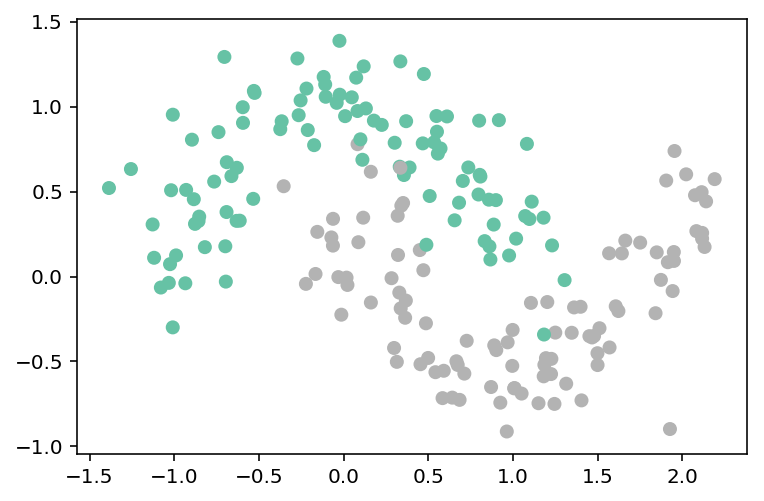

In [4]:
# Se generan los x_test, y_test
noise = 0.2
X, y = make_moons(200, noise=noise, random_state=2718)
X_test, y_test = make_moons(40, noise=noise,
                            random_state=31415)
plt.scatter(*X.T, c=y, cmap="Set2")

In [5]:
#se realiza el model con Pipeline usando polinomio de grado 30 y Regresión Logística

model= Pipeline([
    ("poly", PolynomialFeatures(degree=30, include_bias=False)),
    ("lr", LogisticRegression(penalty='none',solver='lbfgs', max_iter=1000))
])



In [ ]:
#Se realiza un BaggingClassifier con 100 arboles y con remplazamiento 
bagging_logreg = BaggingClassifier(model, n_estimators=100, 
                                   random_state=314, bootstrap=True, 
                                   n_jobs=-1,oob_score=True,
                                   max_samples=100,verbose=0 )

In [6]:

model.fit(X, y)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=30, include_bias=False,
                                    interaction_only=False, order='C')),
                ('lr',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=1000,
                                    multi_class='warn', n_jobs=None,
                                    penalty='none', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [6]:
bagging_logreg.fit(X, y)
bagging_logreg.oob_score_

0.95

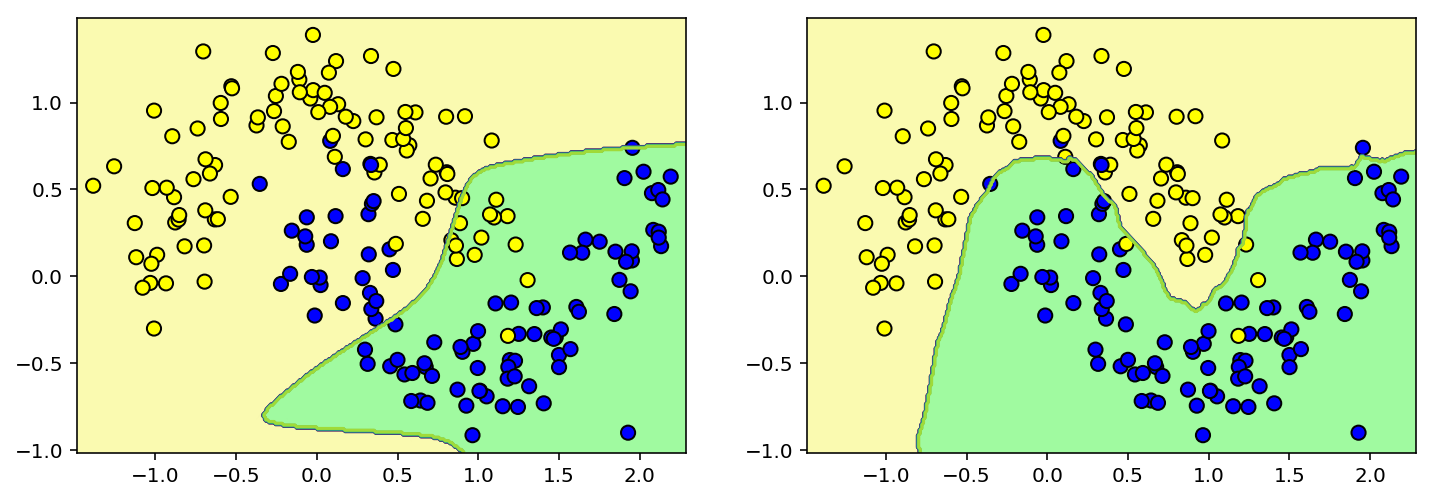

In [7]:
fig, ax = plt.subplots(1,2, figsize=(12, 4))
#model
utils.plot_classf_model(X, y, model, ax=ax[0], contour=True)
#bagging
utils.plot_classf_model(X, y, bagging_logreg, ax=ax[1], contour=True)


##
En las gráficas se observa que con el modelo Bagging se obtiene una mejor distribucion de espacios al comportamiento de los puntos

In [8]:
test = BaggingClassifier(base_estimator=model, n_estimators=100, random_state=314, oob_score=True)
test.fit(X,y)
test.oob_score_

0.94

In [9]:
yhat_model = model.predict(X_test)
yhat_bagging_logreg = bagging_logreg.predict(X_test)

In [11]:
f1_score(y_test, yhat_model)

0.7567567567567567

In [13]:
f1_score(y_test, yhat_bagging_logreg)

0.9500000000000001

##
En la comparación se nota que Bagging obtiene un mejor resultado